문자를 이용한 딥러닝 실습은 저희가 배운 RNN과 LSTM을 활용하여 영화리뷰인 imdb나 뉴스 reuters 데이터에 대한 분류의 정확도를 분석하는 내용으로 진행해 주시면 됩니다.

분석에 대한 여러가지를 예시로 들자면, layer 수, unit의 수, epoch 수와 같은 hyper-parameter 가 있을 수 있을 것 같습니다.

보고서 형식이므로, word 파일이나 PPT 파일등으로 제출해 주시면 되며, 작성하신 코드와 결과, 분석 내용 등이 들어가도록 작성해 주시면 됩니다.

Epoch 1/20
313/313 - 79s - loss: 0.4686 - accuracy: 0.7660 - val_loss: 0.3221 - val_accuracy: 0.8704 - 79s/epoch - 252ms/step
Epoch 2/20
313/313 - 76s - loss: 0.2453 - accuracy: 0.9061 - val_loss: 0.3185 - val_accuracy: 0.8706 - 76s/epoch - 242ms/step
Epoch 3/20
313/313 - 76s - loss: 0.1812 - accuracy: 0.9354 - val_loss: 0.3098 - val_accuracy: 0.8828 - 76s/epoch - 242ms/step
Epoch 4/20
313/313 - 76s - loss: 0.1461 - accuracy: 0.9487 - val_loss: 0.3909 - val_accuracy: 0.8622 - 76s/epoch - 242ms/step
Epoch 5/20
313/313 - 76s - loss: 0.1169 - accuracy: 0.9611 - val_loss: 0.3614 - val_accuracy: 0.8722 - 76s/epoch - 242ms/step
Epoch 6/20
313/313 - 77s - loss: 0.0912 - accuracy: 0.9700 - val_loss: 0.4192 - val_accuracy: 0.8716 - 77s/epoch - 246ms/step
Epoch 7/20
313/313 - 76s - loss: 0.0895 - accuracy: 0.9696 - val_loss: 0.4670 - val_accuracy: 0.8438 - 76s/epoch - 243ms/step
Epoch 8/20
313/313 - 77s - loss: 0.0719 - accuracy: 0.9764 - val_loss: 0.5192 - val_accuracy: 0.8706 - 77s/epoch - 246

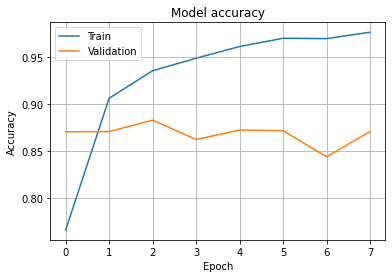

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz = 10000       # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512        # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 16    # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epoch=20,batch_size=64,validation_split=0.2,verbose=2,callbacks=[early])

# 모델 평가
res = embed.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

Epoch 1/15
625/625 - 267s - loss: 0.5018 - accuracy: 0.7484 - val_loss: 0.4820 - val_accuracy: 0.7680 - 267s/epoch - 428ms/step
Epoch 2/15
625/625 - 267s - loss: 0.2943 - accuracy: 0.8825 - val_loss: 0.3582 - val_accuracy: 0.8436 - 267s/epoch - 427ms/step
Epoch 3/15
625/625 - 266s - loss: 0.2301 - accuracy: 0.9125 - val_loss: 0.3298 - val_accuracy: 0.8642 - 266s/epoch - 425ms/step
Epoch 4/15
625/625 - 267s - loss: 0.1931 - accuracy: 0.9287 - val_loss: 0.3446 - val_accuracy: 0.8600 - 267s/epoch - 427ms/step
Epoch 5/15
625/625 - 268s - loss: 0.1495 - accuracy: 0.9451 - val_loss: 0.4058 - val_accuracy: 0.8522 - 268s/epoch - 430ms/step
Epoch 6/15
625/625 - 265s - loss: 0.1249 - accuracy: 0.9567 - val_loss: 0.3964 - val_accuracy: 0.8674 - 265s/epoch - 424ms/step
Epoch 7/15
625/625 - 265s - loss: 0.1122 - accuracy: 0.9602 - val_loss: 0.4109 - val_accuracy: 0.8436 - 265s/epoch - 424ms/step
Epoch 8/15
625/625 - 265s - loss: 0.0937 - accuracy: 0.9669 - val_loss: 0.5074 - val_accuracy: 0.8616 - 

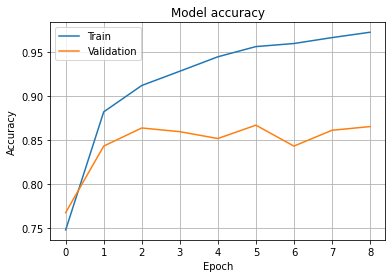

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz = 10000       # 사전의 크기(사전에 있는 단어 개수)
sample_siz= 200        # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 16    # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=15,batch_size=32,validation_split=0.2,verbose=2,callbacks=[early])

# 모델 평가
res = embed.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

Epoch 1/20
625/625 - 118s - loss: 0.4157 - accuracy: 0.8056 - val_loss: 0.3187 - val_accuracy: 0.8728 - 118s/epoch - 188ms/step
Epoch 2/20
625/625 - 116s - loss: 0.2406 - accuracy: 0.9077 - val_loss: 0.3014 - val_accuracy: 0.8790 - 116s/epoch - 185ms/step
Epoch 3/20
625/625 - 116s - loss: 0.1933 - accuracy: 0.9283 - val_loss: 0.3126 - val_accuracy: 0.8766 - 116s/epoch - 185ms/step
Epoch 4/20
625/625 - 115s - loss: 0.1394 - accuracy: 0.9517 - val_loss: 0.3569 - val_accuracy: 0.8732 - 115s/epoch - 185ms/step
Epoch 5/20
625/625 - 115s - loss: 0.0961 - accuracy: 0.9675 - val_loss: 0.6150 - val_accuracy: 0.8550 - 115s/epoch - 185ms/step
Epoch 6/20
625/625 - 115s - loss: 0.0998 - accuracy: 0.9658 - val_loss: 0.4861 - val_accuracy: 0.8694 - 115s/epoch - 184ms/step
Epoch 7/20
625/625 - 115s - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.4746 - val_accuracy: 0.8324 - 115s/epoch - 184ms/step
Epoch 8/20
625/625 - 115s - loss: 0.0535 - accuracy: 0.9819 - val_loss: 0.5460 - val_accuracy: 0.8614 - 

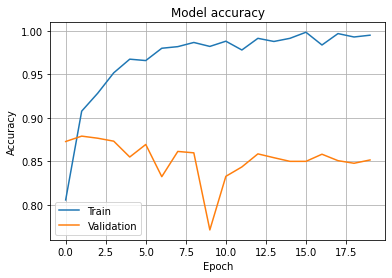

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz = 10000       # 사전의 크기(사전에 있는 단어 개수)
sample_siz= 512        # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 32    # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2,verbose=2)

# 모델 평가
res = embed.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
157/157 - 33s - loss: 0.5023 - accuracy: 0.7577 - val_loss: 0.3799 - val_accuracy: 0.8364 - 33s/epoch - 208ms/step
Epoch 2/20
157/157 - 30s - loss: 0.2608 - accuracy: 0.8971 - val_loss: 0.2877 - val_accuracy: 0.8834 - 30s/epoch - 191ms/step
Epoch 3/20
157/157 - 30s - loss: 0.1840 - accuracy: 0.9357 - val_loss: 0.3186 - val_accuracy: 0.8798 - 30s/epoch - 190ms/step
Epoch 4/20
157/157 - 30s - loss: 0.1473 - accuracy: 0.9504 - val_loss: 0.3404 - val_accuracy: 0.8724 - 30s/epoch - 189ms/step
Epoch 5/20
157/157 - 30s - loss: 0.1132 - accuracy: 0.9628 - val_loss: 0.3682 - val_accuracy: 0.8750 - 30s/epoch - 190ms/step
정확률은 87.47599720954895


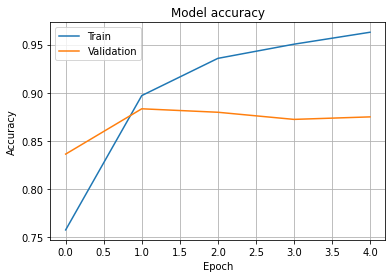

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz = 10000       # 사전의 크기(사전에 있는 단어 개수)
sample_siz= 256        # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 32    # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=128,validation_split=0.2,verbose=2,callbacks=[early])

# 모델 평가
res = embed.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()